##  04 Grabbing HTML tables with Pandas
What if you saw a table you wanted on a web page? For example: https://en.wikipedia.org/wiki/World_Happiness_Report. Can Python help us download those data? 

Why yes. Yes it can.

Specifically, we use the Pandas' `read_html` function, which is able to identify tables in an HTML page and pull them out into a dataframe object.

In [1]:
#Import pandas
import pandas

In [2]:
#Here, the read_html function pulls into a list object any table in the URL we provide.
tableList = pandas.read_html('https://en.wikipedia.org/wiki/World_Happiness_Report',header=0)
print ("{} tables were found".format(len(tableList)))

13 tables were found


In [3]:
#Let's grab the 6th table one and display it's firt five rows
df = tableList[5]
df.head()

,Table,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Overall rank Country or region Score GDP per c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
2,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
3,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
4,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [4]:
#Looks like the first row should be a header, we can fix this with a few more lines of code...
df = pandas.read_html('https://en.wikipedia.org/wiki/World_Happiness_Report')[5]
#Set the header to the 2nd row
df.columns = df.iloc[1]
#Drop the 1st and 2nd rows
df.drop(df.index[[0,1]],inplace=True)
#Set the datatypes
#Show the dataframe
df.head()

1,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
2,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
3,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
4,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
5,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
6,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [5]:
#Now we can save it to a local file using df.to_csv()
df.to_csv("Happiness.csv", # The output filename
          index=False,     # We opt not to write out the index
          encoding='utf8') # This deals with issues surrounding countries with odd characters

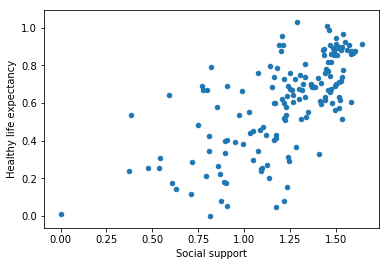

In [6]:
#...or we can examine it
#Here is as quick preview of pandas' plotting capability
%matplotlib inline
df['Social support'] = pandas.to_numeric(df['Social support'])
df['Healthy life expectancy'] = pandas.to_numeric(df['Healthy life expectancy'])
df.plot.scatter(x='Social support',y='Healthy life expectancy');